---
title: "Lab-11"
author: "Dr. Purna Gamage"

output: rmdformats::robobook
---

In [4]:
library(ggplot2)
library(ggExtra)
library(tidyverse)
library(plotly)
library(dplyr)
library(knitr)

# Z-test
 (Usually This is not being used with real data )

In [5]:
z.test(x, y, alternative='two.sided', mu=0, sigma.x=NULL, sigma.y=NULL,conf.level=.95)

ERROR: Error in z.test(x, y, alternative = "two.sided", mu = 0, sigma.x = NULL, : could not find function "z.test"


# T-test

## a. One sample t-test

### Example 1:

Here is an example concerning daily energy intake in kJ for 11 women (Altman, 1991, p. 183). First, the values are placed in a data vector:

In [6]:
daily.intake <- c(5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770)

You might wish to investigate whether the women’s energy intake deviates systematically from a recommended value of 7725 kJ. Assuming that data come from a normal distribution, the object is to test whether this distribution might have mean $\mu = 7725$. This is done with t.test as follows:

Null Hypothesis: $H_0$ :  $\mu = 7725$
Alternative Hypothesis: $H_a$ :  $\mu \neq 7725$

In [7]:
t.test(daily.intake,mu=7725)


	One Sample t-test

data:  daily.intake
t = -2.8208, df = 10, p-value = 0.01814
alternative hypothesis: true mean is not equal to 7725
95 percent confidence interval:
 5986.348 7520.925
sample estimates:
mean of x 
 6753.636 


Since p value is less than 0.05, At 5% significance level, we have enough evidence to reject the null hypothesis and conclude that a women’s energy intake deviates systematically from a recommended value of 7725 kJ.

## b. Two-sample t-test

### Example 2: Birth weight of a baby "NCBirths2004.csv"

The birth weight of a baby is of interest to health officials since many studies have shown possible links between this weight and conditions in later life, such as obesity or diabetes. Researchers look for possible relationships between the birth weight of a baby and the age of the mother or whether or not she smoked cigarettes or drank alcohol during her pregnancy. The Centers for Disease Control and Prevention (CDC), using data provided by the U.S. Department of Health and Hu- man Services, National Center for Health Statistics, the Division of Vital Statistics as well as the CDC, maintain a database on all babies born in a given year <http://wonder.cdc.gov/natality-current.html>. We will investigate different samples taken from the CDC’s database of births.

One data set we will investigate consists of a random sample of 1009 babies born in North Carolina during 2004. The babies in the sample had a gestation period of at least 37 weeks and were single births (i.e., not a twin or triplet).


,ID,MothersAge,Tobacco,Alcohol,Gender,Weight,Gestation,Smoker
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
1,1,30-34,No,No,Male,3827,40,No
2,2,30-34,No,No,Male,3629,38,No
3,3,35-39,No,No,Female,3062,37,No
4,4,20-24,No,No,Female,3430,39,No
5,5,25-29,No,No,Male,3827,38,No
6,6,35-39,No,No,Female,3119,39,No


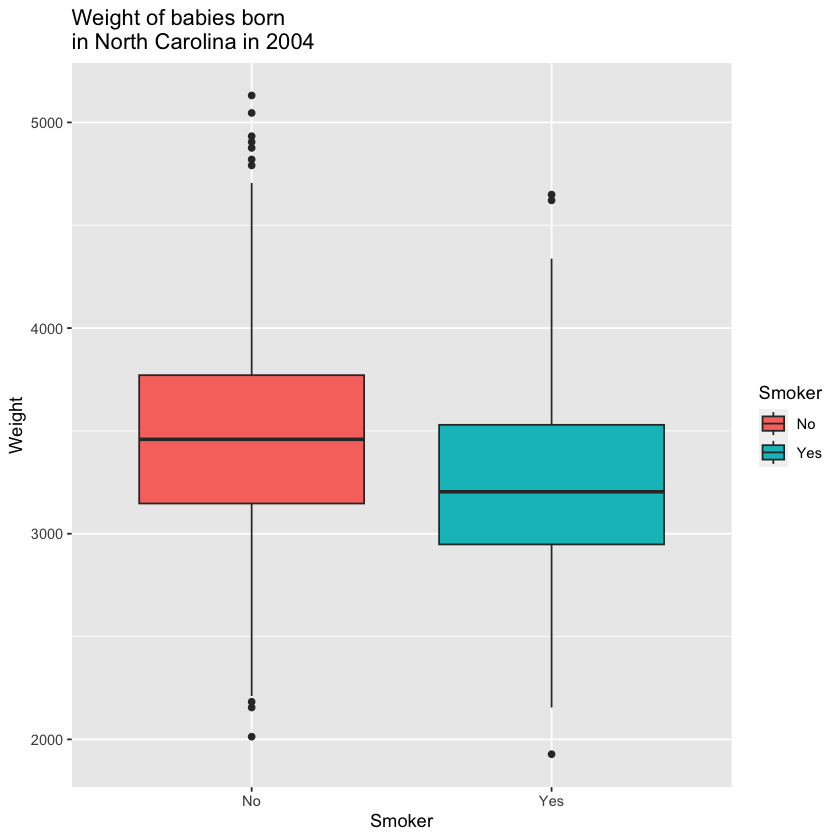

In [8]:
NCBirths2004<-read.csv("NCBirths2004.csv")
head(NCBirths2004)

library(tidyverse)
library(ggplot2)

NCBirths2004 %>%
  ggplot( aes(x = Smoker, y = Weight, fill=Smoker)) +
  geom_boxplot() +ggtitle("Weight of babies born
in North Carolina in 2004")

In [9]:
WeightNS <- subset(NCBirths2004, select=Weight,
                      subset=Smoker=="No", drop=T)

WeightS  <- subset(NCBirths2004, select=Weight,
                      subset=Smoker=="Yes", drop=T)

t.test(WeightNS, WeightS, alt="greater")


	Welch Two Sample t-test

data:  WeightNS and WeightS
t = 4.1411, df = 134.01, p-value = 3.04e-05
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 129.009     Inf
sample estimates:
mean of x mean of y 
 3471.912  3256.910 


### Example 3: Two sample t-test on Titanic Data


Import the data set Titanic.csv which contains survival data (0 = death, 1 = survival) and ages of 658 passengers of the Titanic which sank on April 15, 1912. Examine the null hypothesis that the mean ages of survivors and of victims are the same against the alternative that these mean ages are different, using a t-test. Compute the p-value and state your conclusion. This is a two-sided test. How should the p-value be computed in this case?

Import the data. There are 135 survivors and 523 victims in this data set. We can make a side by side boxplot and see that the age distributions of survivors and victims are very similar, but survivors have a slightly smaller median. The mean age of survivors is 26.98 and the mean age of victims is 31.52. The difference is 4.54.

,ID,Survived,Age
,<int>,<int>,<dbl>
1,1,1,0.92
2,2,0,30.00
3,3,1,48.00
4,4,0,39.00
5,5,0,71.00
6,6,0,47.00


  Survived      Age
1        0 31.51641
2        1 26.97778


[1] 4.538628

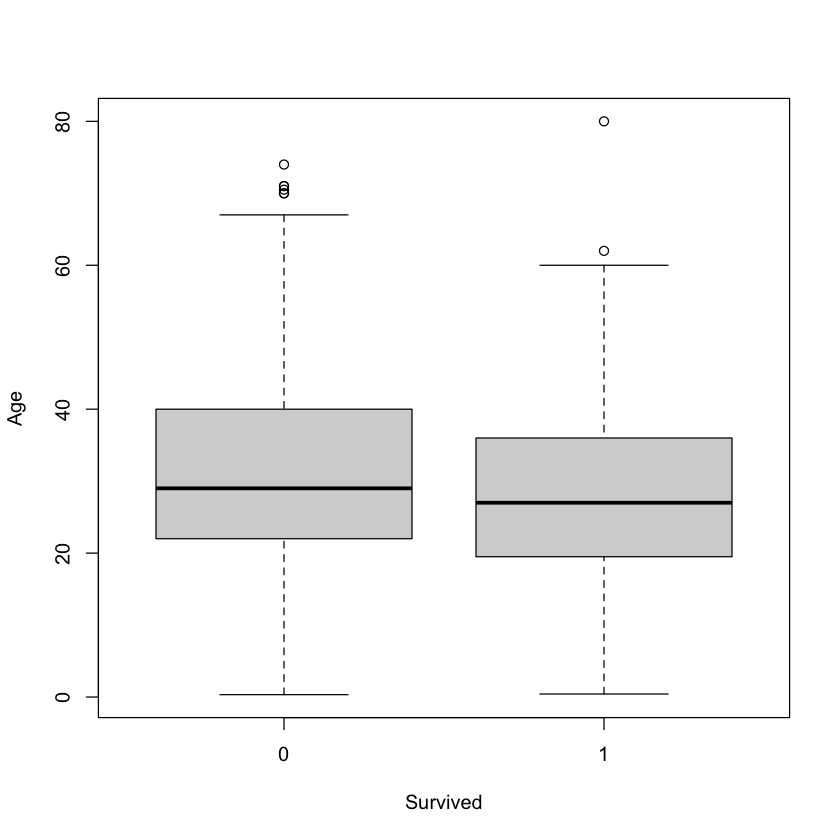

In [10]:
 Titanic <- read.csv("Titanic.csv", stringsAsFactors=FALSE) 
head(Titanic)
boxplot(Age ~ Survived, data = Titanic)

#let's look at the means
agg.df <- aggregate(Age ~ Survived, data = Titanic, FUN = mean)
print(agg.df)

(mean.diff <- agg.df[1,2] - agg.df[2,2])

Let $\mu_S =$ population mean age of survivors and $\mu_v =$ population mean age of victims. 

The null hypothesis is $H_0: \mu_V - \mu_S = 0$ and the 
alternative is $H_a: \mu_V - \mu_S > 0$.   

In [11]:
survivors <- subset(Titanic, select=Age, subset=Survived=="1", drop=T)
victims <- subset(Titanic, select=Age,subset=Survived=="0", drop=T)

t.test(victims, survivors, alt="greater")

###or

t.test(Age ~ Survived, data = Titanic,alternative = "greater")


	Welch Two Sample t-test

data:  victims and survivors
t = 3.091, df = 191.92, p-value = 0.001146
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 2.111742      Inf
sample estimates:
mean of x mean of y 
 31.51641  26.97778 



	Welch Two Sample t-test

data:  Age by Survived
t = 3.091, df = 191.92, p-value = 0.001146
alternative hypothesis: true difference in means between group 0 and group 1 is greater than 0
95 percent confidence interval:
 2.111742      Inf
sample estimates:
mean in group 0 mean in group 1 
       31.51641        26.97778 


Since p value is less than 0.05, At 5% significance level, we have enough evidence to reject the null hypothesis. Therefore there is strong evidence that the mean ages of victims and survivors were not the same but in fact the average age of victims were greater than the average age of survivors.


# Chi squared test

## a. One way table

Define a function to compute chi-squared statistic for one-way tables and let x contains counts of observations. 'pvec' is a probability vector of observations.

![](images/2023-10-30-15-02-33.png)

In [12]:
myX2 = function(x,pvec){ #x-count, #pvec-probabilities
   n <- sum(x) #size
   k <- length(pvec) #length of the prob vector
   pvec <- pvec/sum(pvec) #normalize the prob vector, if necessary
   expected <- n*pvec #np
   return(sum((x-expected)^2/expected))
}

(ii). Demonstration Example.

- Simulate data from a multinomial distribution,
$$
p=(.3, .3, .2, .2) \text {, size } n=40
$$
- Null hypothesis: This comes from a multinomial distribution with $p=(.2, .2, .3, .3)$
- Can the test detect that $H_0$ is not true?

Let's simulate a single random multinomial sample of size 40 with probabilities 0.3,0.3,0.2,0.2.

In [13]:
(x0 <- rmultinom(1,40,prob = c(.3,.3,.2,.2))) #like 40 people buying 4 items
colSums(x0)

11
15
4
10


[1] 40

(iii) Compute Chi-squared statistic, assuming the null hyothesis. 

In [14]:
#specify the null distribution (which  we know is wrong)
pvec.0 = c(.2,.2,.3,.3) # probabilities for null distribution

X2.obs <- myX2(x0, pvec.0)
X2.obs

p.value=pchisq(X2.obs,df=4-1,lower.tail = FALSE)
p.value

[1] 12.91667

[1] 0.004820328

At 5% significance level we can reject the null hypothesis and conclude that we have enough evidence to say that our data does not come from a multinomial distribution with probabilities (.2,.2,.3,.3).

(iv) Alternatively: Obtain the Null distribution.

[1] 0.0046

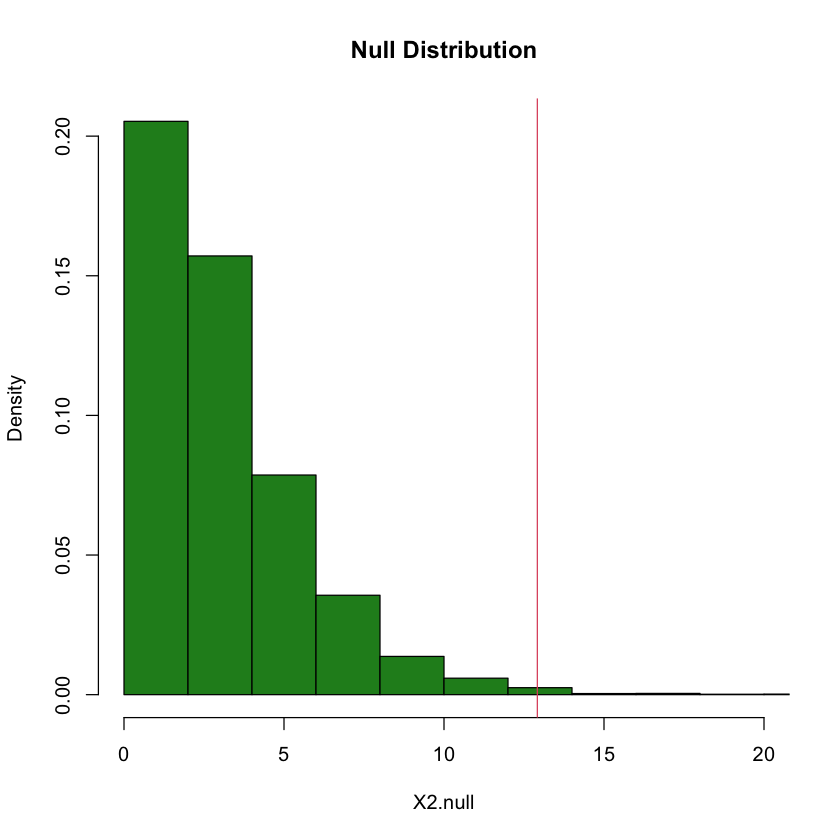

In [15]:
X2.null <- replicate(10000, myX2(rmultinom(1,size = 40,prob = pvec.0),pvec.0)) #null distribution obtain by replicating the experiment 10,000

## Null distribution

hist(X2.null, prob = T, xlim = c(0,20), col = "forestgreen", main="Null Distribution")                     
abline(v = X2.obs, col = 2) #test statistic value



#p-value
mean(X2.null > X2.obs) #p-value  : Probability or fraction of times extreme values observed than the test statistic calculated by assuming null is true                  

(v) You can also use the Chi squared test:

In [16]:
chisq.test(x0, p = pvec.0)


	Chi-squared test for given probabilities

data:  x0
X-squared = 12.917, df = 3, p-value = 0.00482


Reject the null hypothesis at 0.05 significance level and conclude that we have enough evidence to say that our data does not come from a multinomial distribution with probabilities (.2,.2,.3,.3).






## Two-way table

## Example 5

(a) Import gss2002 data

In [17]:
gss2002 <- read.csv("gss2002.csv")

head(gss2002)

,ID,Region,Gender,Race,Education,Marital,Religion,Happy,Income,PolParty,...,Marijuana,DeathPenalty,OwnGun,GunLaw,SpendMilitary,SpendEduc,SpendEnv,SpendSci,Pres00,Postlife
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,South Central,Female,White,HS,Divorced,Inter-nondenominational,Pretty happy,30000-34999,Strong Rep,...,NA,Favor,No,Favor,Too little,Too little,About right,About right,Bush,Yes
2,2,South Central,Male,White,Bachelors,Married,Protestant,Pretty happy,75000-89999,Not Str Rep,...,Not legal,Favor,Yes,Oppose,About right,Too little,About right,About right,Bush,Yes
3,3,South Central,Female,White,HS,Separated,Protestant,NA,35000-39999,Strong Rep,...,NA,NA,NA,NA,NA,NA,NA,NA,Bush,NA
4,4,South Central,Female,White,Left HS,Divorced,Protestant,NA,50000-59999,"Ind, Near Dem",...,NA,NA,NA,NA,About right,Too little,Too little,Too little,NA,NA
5,5,South Central,Male,White,Left HS,Divorced,Protestant,NA,40000-49999,Ind,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,South Central,Male,White,HS,Divorced,Catholic,Pretty happy,40000-49999,"Ind, Near Rep",...,NA,Favor,Yes,Oppose,Too little,Too little,Too little,Too little,Bush,Yes


(b) Make a few one-way tables

In [18]:
table(gss2002$Region) #7 different regions
sum(is.na(gss2002$Region))#NA?

table(gss2002$Race) #3 Race
sum(is.na(gss2002$Race))

table(gss2002$Politics)
sum(is.na(gss2002$Politics))#lot of NAs

#clean the Politics variable
gss2002.clean <- gss2002[!is.na(gss2002$Politics),]

sum(is.na(gss2002.clean$Politics))


##or

#not very good to do it this way, because you will loose information 
#gss2002.clean = na.omit(gss2002)
#sum(is.na(gss2002.clean$Happy))


       Mid-Atl       Mountain       New Engl  North Central        Pacific 
           435            165            158            684            366 
South Atlantic  South Central 
           486            471 

[1] 0


Black Other White 
  410   167  2188 

[1] 0


          Conservative Extremely conservative      Extremely liberal 
                   210                     41                     47 
               Liberal               Moderate  Slightly conservative 
                   143                    522                    209 
      Slightly liberal 
                   159 

[1] 1434

[1] 0

(c) Make a two-way table of Region and Politics.

In [19]:
table(gss2002.clean$Region, gss2002.clean$Politics)

# This is a 7 x 7 table.
# is there a connection? Are there any characteristics in different regions? for example, North Central is moderate  than other regions. or People in North central is more conservative than the other regions.

                
                 Conservative Extremely conservative Extremely liberal Liberal
  Mid-Atl                  29                      2                 9      29
  Mountain                 14                      1                 4      10
  New Engl                  9                      1                 3       9
  North Central            37                     12                 8      37
  Pacific                  30                      5                 6      22
  South Atlantic           43                     11                10      20
  South Central            48                      9                 7      16
                
                 Moderate Slightly conservative Slightly liberal
  Mid-Atl              94                    28               20
  Mountain             28                    13                8
  New Engl             28                     8               16
  North Central       148                    56               41
  Pacific

(d) Chi-square statistic for a two-way table (treated as a matrix).

Let's practice by calulating the test statistic by hand.

In [20]:
gss2002.clean <- gss2002[!is.na(gss2002$Politics) & !is.na(gss2002$Region),]

A <- table(gss2002.clean$Region, gss2002.clean$Politics)
A

(r <- rowSums(A)) #how many individuals in each Region
(c <- colSums(A)) #how many individuals for each Political view

N = sum(A)

expected <- outer(r,c)/N #multiplying all possible combinations by 'outer()' function

expected [1,1] #check the first cell-expected count
A[1,1] # check the observed value for this entry

#let's write a function to do this
myX2.2 = function(A){
  r <- rowSums(A)
  c <- colSums(A)
  N = sum(A)
  expected <- outer(r,c)/N
  return(sum((A-expected)^2/expected))
}

                
                 Conservative Extremely conservative Extremely liberal Liberal
  Mid-Atl                  29                      2                 9      29
  Mountain                 14                      1                 4      10
  New Engl                  9                      1                 3       9
  North Central            37                     12                 8      37
  Pacific                  30                      5                 6      22
  South Atlantic           43                     11                10      20
  South Central            48                      9                 7      16
                
                 Moderate Slightly conservative Slightly liberal
  Mid-Atl              94                    28               20
  Mountain             28                    13                8
  New Engl             28                     8               16
  North Central       148                    56               41
  Pacific

Mid-Atl       Mountain       New Engl  North Central        Pacific 
           211             78             74            339            177 
South Atlantic  South Central 
           230            222

Conservative Extremely conservative      Extremely liberal 
                   210                     41                     47 
               Liberal               Moderate  Slightly conservative 
                   143                    522                    209 
      Slightly liberal 
                   159

[1] 33.29076

[1] 29

(e) Compute Chi square statistic for GSS 2002 data

In [21]:
x2=myX2.2(table(gss2002.clean$Region, gss2002.clean$Politics))
pchisq(x2, df = (7-1)*(7-1), lower.tail = F) #p-value

[1] 0.01595271

Since the p-value is less than 0.05, at 0.05 significance we reject H0.We have enough evidence to conclude that there is a relationship between the Region and Political views of people in the US.


## Example 6:Homogeneity of populations.

_Examine happiness levels by gender_ 


In [22]:
gss2002.clean2 <- gss2002[!is.na(gss2002$Gender) & !is.na(gss2002$Happy),]

tableGH= table(gss2002.clean2$Gender, gss2002.clean2$Happy)
kable(tableGH) #nice table representation

myX2.obs <- myX2.2(tableGH)

pchisq(myX2.obs, df = (2-1)*(3-1), lower.tail = F)



|       | Not too happy| Pretty happy| Very happy|
|:------|-------------:|------------:|----------:|
|Female |           109|          406|        205|
|Male   |            61|          378|        210|

[1] 0.004168469

Or you can do the Chi squared test using Chis1.test()

In [23]:
chisq.test(tableGH)


	Pearson's Chi-squared test

data:  tableGH
X-squared = 10.96, df = 2, p-value = 0.004168


since p-value is less than 0.05, at 5\% significance level, we reject the null hypothesis and we have enough evidence to conclude that the happiness levels are different for different genders.(or there is a relationship between the happiness and the gender)


#### Examine outputs:

In [24]:
test.1 <- chisq.test(tableGH)
names(test.1)

test.1$parameter
test.1$method
test.1$observed

test.1$residuals
test.1$stdres #standardized residuals

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"

df 
 2

[1] "Pearson's Chi-squared test"

        
         Not too happy Pretty happy Very happy
  Female           109          406        205
  Male              61          378        210

        
         Not too happy Pretty happy Very happy
  Female     2.0719656   -0.3117401 -0.8976442
  Male      -2.1823602    0.3283497  0.9454708

        
         Not too happy Pretty happy Very happy
  Female     3.2155409   -0.6926213 -1.5617487
  Male      -3.2155409    0.6926213  1.5617487

Check if the Yate's continuity correction is needed?

This is needed when expected cell counts are very small(<=5).

In [25]:
A <- table(gss2002.clean2$Gender, gss2002.clean2$Happy)

r <- rowSums(A)
c <- colSums(A)
N = sum(A)
expected <- outer(r,c)/N
expected

,Not too happy,Pretty happy,Very happy
Female,89.40833,412.3302,218.2615
Male,80.59167,371.6698,196.7385


In [26]:
#equivelently
test.1$expected

,Not too happy,Pretty happy,Very happy
Female,89.40833,412.3302,218.2615
Male,80.59167,371.6698,196.7385


No need of the Yate's continuity correction.

# Permutation test. 

## Example 4: Permutation test for mouse data

In [27]:
load("mice.rdata")
print(mice)

#demontration
(mice[sample(24,6, replace = F),]) #sample 6 from 24 observations, just to look at the data

         pop time
1    control   30
2    control   19
3    control   21
4    control   40
5    control   32
6    control   31
7    control   28
8    control   26
9    control   27
10   control   26
11 treatment   17
12 treatment   18
13 treatment   21
14 treatment   22
15 treatment   21
16 treatment   23
17 treatment   15
18 treatment   15
19 treatment   21
20 treatment   18
21 treatment   20
22 treatment   16
23 treatment   29
24 treatment   23


,pop,time
,<fct>,<dbl>
24,treatment,23
12,treatment,18
20,treatment,18
14,treatment,22
5,control,32
17,treatment,15


(a). We use the test statistic $\bar x_c - \bar x_t$.

(i) Compute these means with the __aggregate()__ function.

In [28]:
aggregate(time ~ pop, data = mice, FUN = mean)

pop,time
<fct>,<dbl>
control,28.00000
treatment,19.92857


(ii) Define a function to compute the test statistic; $\bar x_c - \bar x_t$.

In [29]:
mytest.1 = function(mydf){
  agg = aggregate(time ~pop, data = mydf, FUN = mean)
  return(agg$time[1] - agg$time[2]) #xbar_c - xbar_t
}

(iii) Try it out for the given data.

In [30]:
mytest.1(mice) # this is my observed test statistic

[1] 8.071429

(iv) Permute the labels and compute the test statistic after the permutation.

In [31]:
mice.permute = mice #create a copy of the data
mice.permute$pop = mice.permute$pop[sample(24,24,replace=F)] #one permutation of the 24 labels

head(mice.permute)
head(mice)
mytest.1(mice.permute) #test statistic for the permuted set

,pop,time
,<fct>,<dbl>
1,control,30
2,treatment,19
3,treatment,21
4,treatment,40
5,treatment,32
6,treatment,31


,pop,time
,<fct>,<dbl>
1,control,30
2,control,19
3,control,21
4,control,40
5,control,32
6,control,31


[1] -5.3

(vi) We can do this with a single function

In [32]:
#this function returns the test statistic value for the permutation test
#here we are permuting the laels
permute.sample.1 = function(){
  mice.permute$pop = mice.permute$pop[sample(24,24,replace=F)]
  return(mytest.1(mice.permute))
}

(vii) Try it out

In [33]:
permute.sample.1() #just one permiutation

[1] 3.1

(viii) Now do this a large number of times and look at the result.

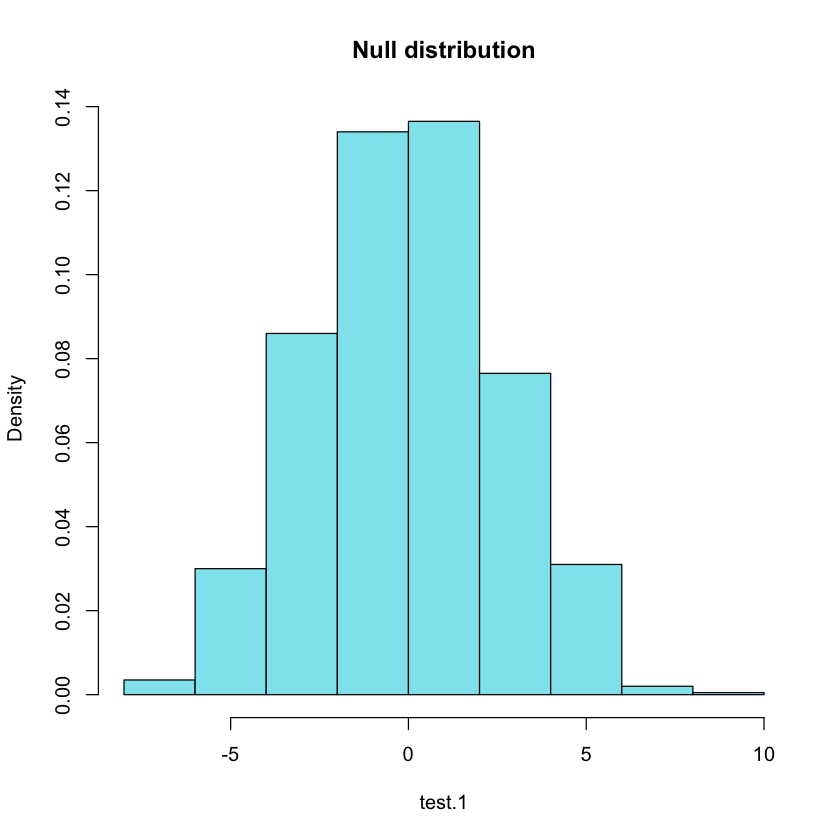

In [34]:
N = 1000
test.1 = replicate(N,permute.sample.1())
hist(test.1, main = "Null distribution", prob=T,col="cadetblue2")

(ix) The observed value was about 8.

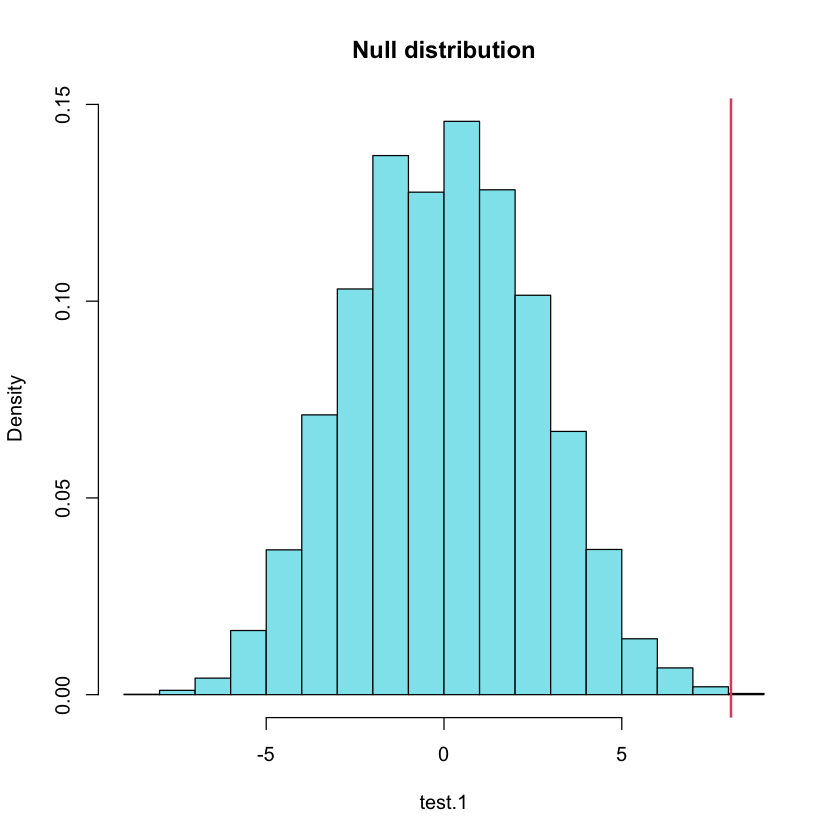

In [35]:
N = 10000
test.1 = replicate(N,permute.sample.1())
hist(test.1, main = "Null distribution", prob=T, col="cadetblue2")
abline(v = mytest.1(mice), col = 2, lwd = 2)

(x) Estimate for p-value: Fraction of permutations where the test statistic is larger than the observed one.  

In [36]:
mean(test.1 > mytest.1(mice))#p-value

[1] 2e-04

(xi) What does this mean?

the value we observed (test.1) is at the far end of the null distribution.

The fraction of values from the null distribution is larger than the observed value is the p-value, which is low in this case. 

Therefore We can reject the null hypothesis. So at 5\% significance level we have enough evidence to conclude that average time to complete the maze of treatment group mice and control group mice are different.


(xii) Alternative: Make random subsets of the completion time

In [37]:
permute.sample.2 = function(){
  mysample = sample(24,10,replace = F)
  return(mean(mice$time[mysample]) - mean(mice$time[-mysample]))#now we sample(permute) observed times, and we assume first 10 is "control" group and the second 14 values belongs to "treatment" group.
}
permute.sample.2()

[1] 0.8714286

This  runs a lot faster.

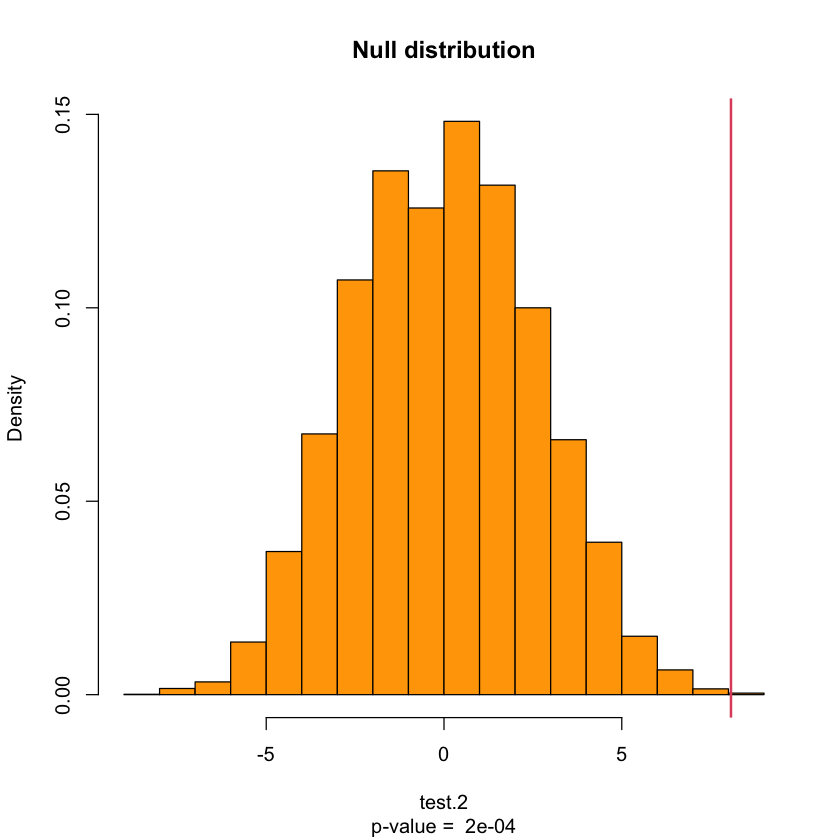

In [38]:
N = 10000
test.2 = replicate(N,permute.sample.2())
hist(test.2, main = "Null distribution", , prob=T, 
     sub = paste("p-value = ", round(mean(test.2 > mytest.1(mice)),4)), col="orange")
abline(v = mytest.1(mice), col = 2, lwd = 2)

Still the p-vlaue is less than 0.05.

### (b). Using the Median as test statistic!

(i) Function to compute difference of medians for control and treatment groups

In [39]:
median.diff = median(mice$time[mice$pop == "control"]) -
  median(mice$time[mice$pop == "treatment"])

(ii) Make a single permutation (random subsets)

In [40]:
permute.sample.3 = function(){
  mysample = sample(24,10,replace = F)
  return(median(mice$time[mysample]) - median(mice$time[-mysample]))
}

(iii) Many random subsets, histogram, p-value

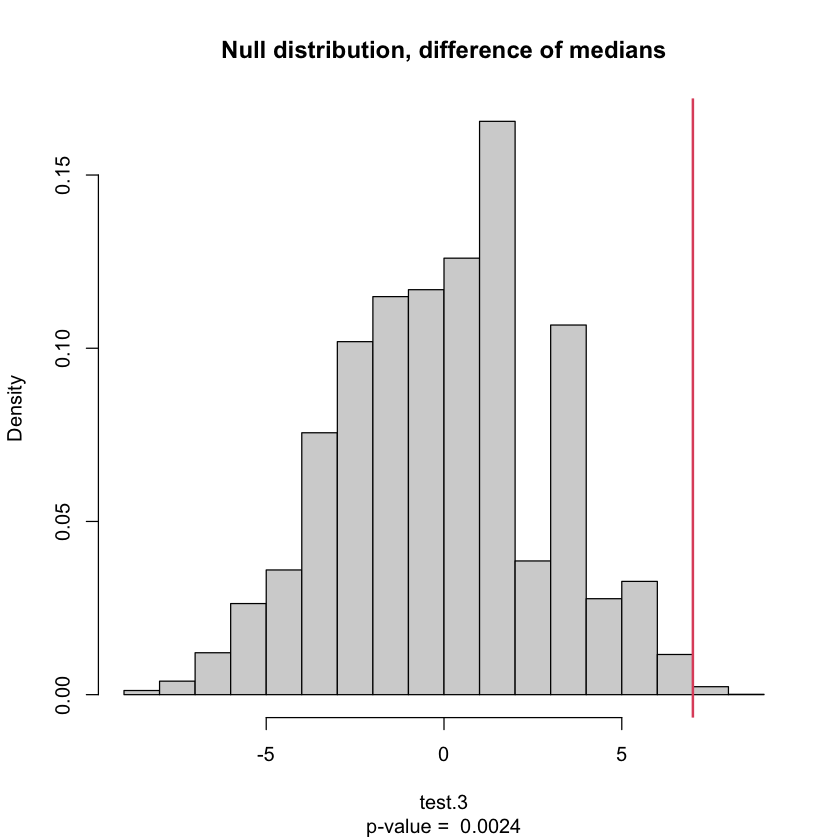

In [41]:
N = 10000
test.3 = replicate(N,permute.sample.3())
hist(test.3, main = "Null distribution, difference of medians", sub = paste("p-value = ", round(mean(test.3 > median.diff),4)),prob=T)
abline(v = median.diff, col = 2, lwd = 2)

The conclusion is the same, but the p-value is a little larger but still less than 0.05. 





### Example 7. Permutation test for gss2002 data. 

Are levels of happiness distributed the same way for both genders?

This is a question about homogeneity of populations.
Null hypothesis: Homogeneity. This is a composite null hypothesis.
- Alternative hypothesis: No homogeneity, distributions differ (also composite).
- Define a test statistic (input = table).
- Compute the test statistic for the observed table.

- Sample from null distribution: In the original data frame, permute one of the columns randomly. If the null hypothesis is true, this should make no difference. Make a new two-way table. Compute the test statistic.
- Repeat this many times. Does the observed value of the test statistic fit in or is it an extreme value in the null distribution?
- **Careful: Need to delete NA rows before all the permutations, since otherwise population counts may change due to permutations!**

If the data is coming from the same distribution then the output won't change much. Because you are permuting from one same distribution.

After repeating many times, now we have a sample of the test statistic- simulated distribution of the test statistic from the null distribution.  Is the observed value in the middle of that null distribution? or is it an extreme value?

If it is somewhere in the middle, that means that what I'm observing is nothing special, that the null hypothesis is probably true. No evidence against it.

But if it is an extreme value,at the tail, this cast doubt, so the null hypothesis is probably not true.



(i) Make a single permutation

In [42]:
tableGH= table(gss2002.clean2$Gender, gss2002.clean2$Happy)
N <- sum(tableGH)

gss.perm = gss2002.clean2 #make a new copy of the data
gss.perm$Happy = gss.perm$Happy[sample(N,N)] #let's permute happiness levels,no replacement, shuffle everything around and make a new table.

#now my happy labels are shuffled.

table(gss.perm$Gender, gss.perm$Happy) #new table
#compare
tableGH #initial table

        
         Not too happy Pretty happy Very happy
  Female            92          431        197
  Male              78          353        218

        
         Not too happy Pretty happy Very happy
  Female           109          406        205
  Male              61          378        210

(ii) Compute Chi-square test statistic for the permuted table.

In [43]:
myX2.2(table(gss.perm$Gender, gss.perm$Happy))#much lower than the observed value

myX2.obs #this is our observed value
#myX2.obs <- myX2.2(table(gss2002.clean$Gender, gss2002.clean$Happy))

[1] 6.31052

[1] 10.96041

(iii) Write a function for permutation.

In [44]:
myperm = function(){
  gss.perm <- gss2002.clean
  N <- length(gss.perm[,1])
  gss.perm$Happy <- gss.perm$Happy[sample(N,N)]
  return(myX2.2(table(gss.perm$Gender, gss.perm$Happy))) #calculate the test statistic for each permutation.
}

(iv) Repeat many times, make histogram, find p-value

[1] 0.004

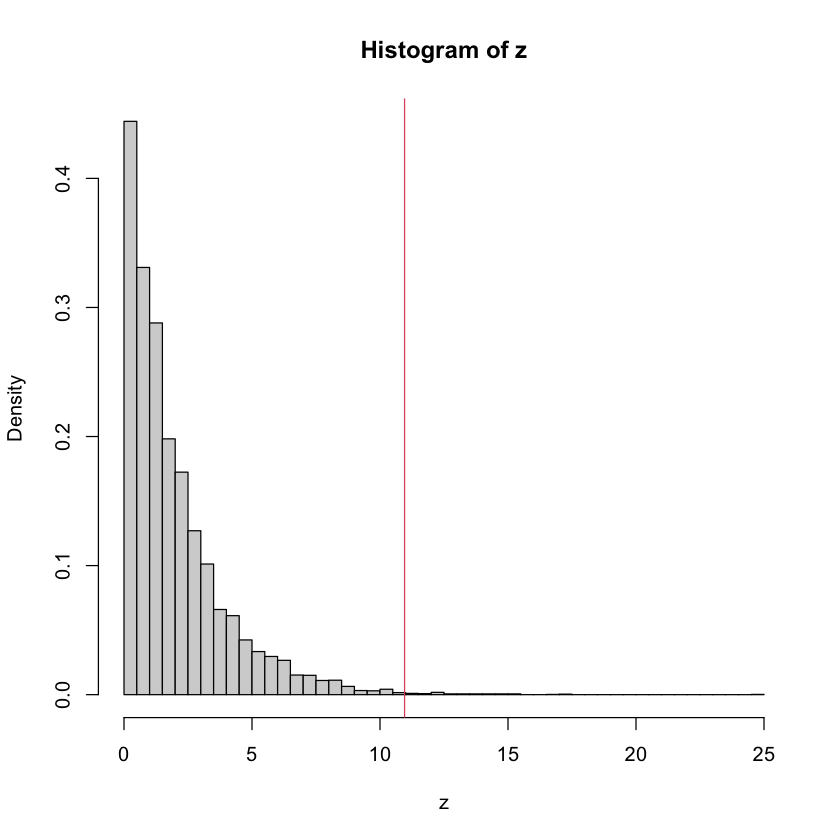

In [45]:
z <- replicate(10000, myperm()) #10000 permutations

hist(z, breaks = 50, prob = T)
abline(v = myX2.obs, col = 2)
mean(z > myX2.obs) #p-value

the value we observed (myX2.obs) is now at the far end. So we can conclude that what we observe is highly unlikely.

The fraction of values from the null distribution is larger than the observed value is the p-value, which is low in this case. 

(v) Conclusion? 

We can reject the null hypothesis at 5\% significance level. We have enough evidence to conclude that The happiness is not same for both genders.



# Exam Problems

## Problem 1: Hypothesis Testing and C.Is


What is normal body temperature? The standard has been $98.6^0 F$. Suppose a medical worker suspects that body temperatures in children in Sodor are higher than the normal body temperature. She obtains measurements from a random sample of 18 children and finds the following:

In [46]:
c(98.0, 98.9, 98.9, 98.9, 99.0, 98.4, 98.9, 99.0, 98.8, 99.2, 
      98.6, 98.6, 99.1, 98.8, 98.9, 98.9, 98.5, 98.7)

[1] 98.0 98.9 98.9 98.9 99.0 98.4 98.9 99.0 98.8 99.2 98.6 98.6 99.1 98.8 98.9
[16] 98.9 98.5 98.7

a. What are the null and alternative hypotheses for this test?

b. Carry out the test and state a conclusion in a complete sentence.

c. What can you say about the confidence interval?

d. Make a bootstrap confidence interval of the mean body temperature with the data from this problem and compare the result to your answer to part (c).


### Solution

a. Let $\theta$ be the mean body temperature of children in this town. 

The null hypothesis is that this is the same as everywhere else, $H_0: \theta = 98.6$. The alternative is that the mean body temperature in this town is higher, $\theta > 98.6$.  

b. Carry out a t-test:

In [47]:
x = c(98.0, 98.9, 98.9, 98.9, 99.0, 98.4, 98.9, 99.0, 98.8, 99.2, 
      98.6, 98.6, 99.1, 98.8, 98.9, 98.9, 98.5, 98.7)
t.test(x, mu = 98.6, alternative = "greater")


	One Sample t-test

data:  x
t = 2.745, df = 17, p-value = 0.006907
alternative hypothesis: true mean is greater than 98.6
95 percent confidence interval:
 98.66715      Inf
sample estimates:
mean of x 
 98.78333 


The p-value is less than 0.01%. Therfore we can reject the null hypothesis at 5% significance level. There is strong evidence, to conclude that the mean body temperature of children in this town is higher than  98.6.  

c. the 95% lower confidence bound is larger than 98.6. i.e we are 95% confident that the true mean body temperature is higher than 98.6.

d. Here is 95% bootstrap confidence bound. 

In [48]:
 boot.129 <- replicate(10000, mean(sample(x,length(x), replace = T)))
quantile(boot.129, 0.05)

5% 
98.67222

It is simillar to what we have obtained from the t-test.


## Problem 2: Chi-square test.

Import the GS2002 data set. Use a $\chi^2$  test of independence to determine if marital status and education are independent. 

a. State your null and alternative hypothesis. 

$H_0:$ The marital status and education levels are independent.

$H_a:$ The marital status and education levels are not independent

b. Are these attributes independent? Why/why not? 

c. There was no warning message when the test was done. Why not?

d. Identify two cells that contributed very little (< 1) to the chi-squared statistic and two other cells that contributed a lot (> 5).

e. For example, There are more single people (Never married) who got a  "High School degree" than expected. Can you think of a reason?


In [49]:
gss <- read.csv("GSS2002.csv")
head(gss)

(A <- table(gss$Education, gss$Marital))

r <- rowSums(A)
c <- colSums(A)
N = sum(A)
(expected <- round(outer(r,c)/N,2))


chisq.test(A)

,ID,Region,Gender,Race,Education,Marital,Religion,Happy,Income,PolParty,...,Marijuana,DeathPenalty,OwnGun,GunLaw,SpendMilitary,SpendEduc,SpendEnv,SpendSci,Pres00,Postlife
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,South Central,Female,White,HS,Divorced,Inter-nondenominational,Pretty happy,30000-34999,Strong Rep,...,NA,Favor,No,Favor,Too little,Too little,About right,About right,Bush,Yes
2,2,South Central,Male,White,Bachelors,Married,Protestant,Pretty happy,75000-89999,Not Str Rep,...,Not legal,Favor,Yes,Oppose,About right,Too little,About right,About right,Bush,Yes
3,3,South Central,Female,White,HS,Separated,Protestant,NA,35000-39999,Strong Rep,...,NA,NA,NA,NA,NA,NA,NA,NA,Bush,NA
4,4,South Central,Female,White,Left HS,Divorced,Protestant,NA,50000-59999,"Ind, Near Dem",...,NA,NA,NA,NA,About right,Too little,Too little,Too little,NA,NA
5,5,South Central,Male,White,Left HS,Divorced,Protestant,NA,40000-49999,Ind,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,South Central,Male,White,HS,Divorced,Catholic,Pretty happy,40000-49999,"Ind, Near Rep",...,NA,Favor,Yes,Oppose,Too little,Too little,Too little,Too little,Bush,Yes


           
            Divorced Married Never Married Separated Widowed
  Bachelors       66     227           119         9      22
  Graduate        33     128            50         4      15
  HS             264     660           382        51     128
  Jr Col          34     113            43         9       3
  Left HS         48     141           111        22      78

,Divorced,Married,Never Married,Separated,Widowed
Bachelors,71.43,203.68,113.16,15.25,39.48
Graduate,37.08,105.75,58.75,7.92,20.50
HS,239.43,682.78,379.32,51.11,132.36
Jr Col,32.57,92.88,51.60,6.95,18.00
Left HS,64.49,183.91,102.17,13.77,35.65



	Pearson's Chi-squared test

data:  A
X-squared = 116.16, df = 16, p-value < 2.2e-16


b. The p-value is very small, hence there is very strong evidence that the attributes are not independent. 

c. There was no warning since all expected counts are > 5 and that is the only possible reason for a warning here. 

In [50]:
test<-chisq.test(A)
test$expected

,Divorced,Married,Never Married,Separated,Widowed
Bachelors,71.42572,203.68370,113.15761,15.248188,39.48478
Graduate,37.08333,105.75000,58.75000,7.916667,20.50000
HS,239.42935,682.77717,379.32065,51.114130,132.35870
Jr Col,32.56884,92.87609,51.59783,6.952899,18.00435
Left HS,64.49275,183.91304,102.17391,13.768116,35.65217


### Yate's continuity correction

Some of the expected counts are less than 10. Therefore, you may be able to use the Yate's continuity correction;

In [51]:
chisq.test(A, correct = TRUE)


	Pearson's Chi-squared test

data:  A
X-squared = 116.16, df = 16, p-value < 2.2e-16


There is no apparent difference between the initial results and the corrected results. Most of the researchers use this correction when you have an at least one expected cell count less than 5.

d. The cells for “divorced and High School” and for “never married and High School” contribute a lot, meanwhile , the cells for “Separated and Junior college” and “Separated and Graduate” contribute very little (expected and observed are close). 
